In [1]:
import numpy as np   
import pandas as pd        
from scipy import stats as sts 

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

from math import factorial as fact

## Больше задач на проверку гипотез

<img src="../images/eshe.png" width="250" align='center'>

### Задача №1: Игра Престолов или Дом Дракона? 

<img src="../images/dom_drakona_mem.jpeg" width="400" align='left'>

У вас есть данные о просмотре Джоном серий Игры престолов и Дома дракона за некоторый промежуток времени. Вы хотите понять, заинтересовали ли эти оба сериала Джона одинаково. Для этого проверьте гипотезу о том, что Джон в среднем в день смотрел одинаковое число серий у обоих из этих сериалов. 

In [22]:
df = pd.read_csv('../data/got_hod_series.csv')

__Решение:__

Серии – это счетчики, поэтому удобнее всего описать наши данные распределением Пуассона. 

Пусть $X_1, \ldots, X_n$ – наблюдения по просмотру серий Игры Престолов

$$
X_i \sim Poiss(\lambda_{got})
$$

А $Y_1, \ldots, Y_m$ – наблюдения по просмотру серий Дома Дракона


$$
Y_i \sim Poiss(\lambda_{hod})
$$

__Замечание:__ при этом $n$ и $m$ могут совпадать, а могут и нет.

Тогда хотим проверить следующую гипотезу:

$$
\begin{aligned}
& H_0: \lambda_{got} = \lambda_{hod} \\
& H_1: \lambda_{got} \neq \lambda_{hod}
\end{aligned}
$$

Можно переписать это в виде:

$$
\begin{aligned}
& H_0: \lambda_{got} - \lambda_{hod} = 0\\
& H_1: \lambda_{got} - \lambda_{hod} \neq 0
\end{aligned}
$$

Приведем это к новому обозначению для удобства:

$$
\lambda_{got} - \lambda_{hod} = \lambda_{d}
$$

Будем проверять по ЦПТ, как делали до этого. Выписываем формулу критерия для _двух независимых выборок_:

$$
\frac{\hat \lambda_d - 0}{\sqrt{\frac{\sigma_{got}^2}{n} + \frac{\sigma_{hod}^2}{m}}} \sim N(0, 1)
$$

__Замечание:__ $\sigma_{got}^2$ и $\sigma_{hod}^2$ мы не знаем, так как это истинные дисперсии, поэтому можем заменить их на выборочные оценки $s_{got}^2$ и $s_{hod}^2$

__Замечание:__ При этом мы с вами знаем, что работаем с распределением Пуассона, а у распределения Пуассона $\sigma^2 = \lambda$, поэтому можем заменить $s_{got}^2$ и $s_{hod}^2$ просто навсего на $\hat \lambda_{got}$ и $\hat \lambda_{hod}$

In [28]:
## Ваш код
got = df.got_series.values
hod = df.hod_series.values


n = len(got)
m = len(hod)


lambda_got = np.mean(got)
lambda_hod = np.mean(hod)


lambda_d = lambda_got - lambda_hod


z_sample = (lambda_d - 0) / np.sqrt(lambda_got / n + lambda_hod / m)
print(f'Выборочное z: {z_sample}')

Выборочное z: -8.859791664986949


__Замечание:__ Здесь мы работаем с двусторонней альтернативной гипотезой, поэтому нам нужно будет посчитать 2 критических значения: левое и правое

In [29]:
alpha = 0.05

norm_gen = sts.norm(0, 1)

z_crit_left = norm_gen.ppf(alpha/2)
print(f'Критическое z слева: {z_crit_left}')

z_crit_right = norm_gen.ppf(1 - alpha/2)
print(f'Критическое z справа: {z_crit_right}')


if abs(z_sample) > z_crit:
    print('Нулевая гипотеза отвергается')
else:
    print('Нулевая гипотеза не отвергается')

Критическое z слева: -1.9599639845400545
Критическое z справа: 1.959963984540054
Нулевая гипотеза отвергается


> Кажется, что Дом Дракона и Игра престолов понравились Джону по-разному

### Задача №2: Любитель ресторанов

Ваш друг любит ужинать в ресторанах, а еще экономить деньги. Он утверждает, что можно поесть в хорошем ресторане со средним чеком 1000 рублей. Вы решили проверить эту гипотезу, поэтому сходили в топ-10 хороших ресторанов и набрали данных о средних чеках. Прав ли ваш друг?

In [63]:
sample = [
    2074.20063876, 2186.0306825 , 2069.34185185, 1819.23816378,
    1702.88575035, 2253.46583296, 2021.12789898, 2153.7653038 ,
    2115.86764342, 2026.53853657
]

__Что тут важно?__

Данных супер мало, поэтому можем проводить только t-test (и то сомнительно, но лучше ничего нет). t-test требует нормальности выборки, но кажется с деньгами это ок

Посмотрим, похоже ли распределение на нормальное:

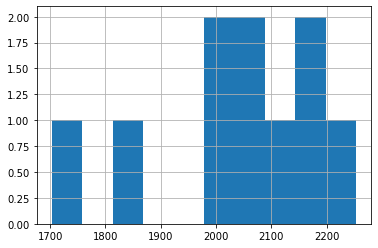

In [66]:
pd.Series(sample).hist();

Так себе похоже конечно, но связано с тем, что мало данных.

Проверим гипотезу: 

$$
\begin{aligned}
& H_0: \mu = 1000 \\
& H_1: \mu > 1000
\end{aligned}
$$

$$
t = \frac{\hat \mu - 1000}{\sqrt{\frac{s^2}{n}}} \sim t(n-1)
$$

In [70]:
mu_hat = np.mean(sample)
n = len(sample)

var_hat = np.var(sample, ddof=n-1)

t_sample = (mu_hat - 1000) / np.sqrt(var_hat / n)
print(f'Выборочное t: {t_sample}')

alpha = 0.05

t_gen = sts.t(n-1)
t_crit = t_gen.ppf(1-alpha)
print(f'Критическое t: {t_crit}')

if t_sample > t_crit:
    print('Нулевая гипотеза отвергается')
else:
    print('Нулевая гипотеза не отвергается')

Выборочное t: 6.585288109424128
Критическое t: 1.8331129326536335
Нулевая гипотеза отвергается


> Кажется на 1000 рублей в ресторане не покушаешь.

### Задача №3: Пересдача

<img src="../images/exam.jpeg" width="400" align='left'>

У вас есть данные студентов, которые написали экзамен на недостаточное число баллов, поэтому пошли на пересдачу. Данные о пересдаче у вас тоже есть, поэтому вы хотите проверить гипотезу о том, что к пересдаче студенты готовятся более тщательно, то есть пишут ее на большее число баллов. 

In [44]:
df = pd.read_csv('../data/test_data.csv')

__Что тут важно?__

1. Как мы видим размер выборки небольшой, поэтому z-test по-хорошему применять нельзя. Можно предположить что данные распределены нормально и применить t-test
2. Выборки зависимые, так как тест и пересдачу писали одни и те же люди. Нужно учесть это при расчете критерия. 

Можно построить гистограмму распределения и проверить выборку на нормальность (или что-то очень похожее)

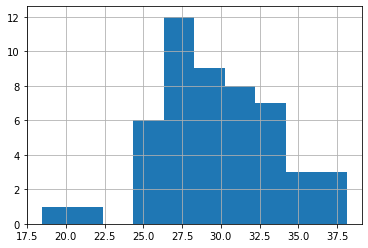

In [67]:
df.test_data.hist();

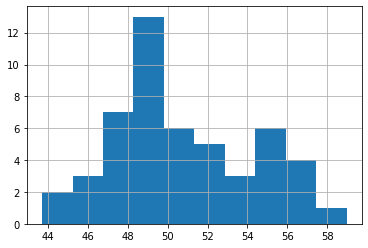

In [68]:
df.retest_data.hist();

Слабовато конечно, но в целом похоже

Проведем t-test:

$$
\begin{aligned}
& H_0: \mu_{test} = \mu_{retest} \\
& H_1: \mu_{test} < \mu_{retest}
\end{aligned}
$$


$$
\begin{aligned}
& H_0: \mu_{test} - \mu_{retest} = 0 \\
& H_1: \mu_{test} - \mu_{retest} < 0
\end{aligned}
$$


$$
\begin{aligned}
& H_0: d = 0 \\
& H_1: d < 0
\end{aligned}
$$

$$
\frac{\bar d - 0}{\sqrt{\frac{s^2_{d}}{n}}} \sim t(n-1)
$$

In [61]:
test = df.test_data.values
retest = df.retest_data.values

d = test - retest

n = len(d)

t_sample = (np.mean(d) - 0) / np.sqrt(np.var(d, ddof=n-1) / n)
print(f'Выборочное t: {t_sample}')


alpha = 0.05

t_gen = sts.t(n-1)
t_crit = t_gen.ppf(alpha)
print(f'Критическое t: {t_crit}')

if t_sample < t_crit:
    print('Нулевая гипотеза отвергается')
else:
    print('Нулевая гипотеза не отвергается')

Выборочное t: -3.6606217074544847
Критическое t: -1.6765508919142635
Нулевая гипотеза отвергается


> Кажется к пересдаче студенты, действительно, готовятся лучше. А может просто пересдача была проще? 🤔